In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline


In [2]:
df = pd.read_csv("../datasets/amazon_bestsellers.csv")
print("Notebook Setup Complete!!")
df.head()

Notebook Setup Complete!!


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [3]:
## Notes
#This notebook will explore Amazon bestselling books data.
#Initial focus will be on data cleaning and basic exploratory analysis.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [5]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


/var/folders/b8/ycqkxj3x1f57xhhdkr3h9nkm0000gn/T/ipykernel_26925/2079797010.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = "Genre", palette ='pastel', edgecolor = 'black')


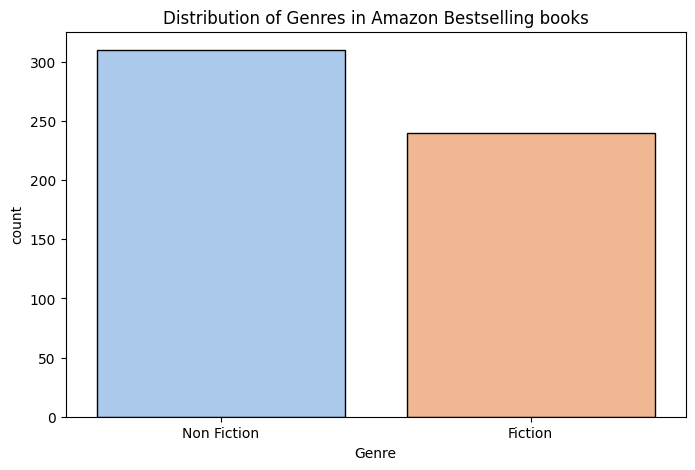

In [6]:
plt.figure(figsize = (8,5))
sns.countplot(data = df, x = "Genre", palette ='pastel', edgecolor = 'black')
plt.title("Distribution of Genres in Amazon Bestselling books")
plt.show()

### Observation
User ratings appear tightly clustered regardless of price,
suggesting price alone may not strongly influence ratings.


/var/folders/b8/ycqkxj3x1f57xhhdkr3h9nkm0000gn/T/ipykernel_26925/1049275177.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = df, x = "Genre", y = "Reviews", palette = 'pastel', edgecolor = "Black", inner = 'quartile')


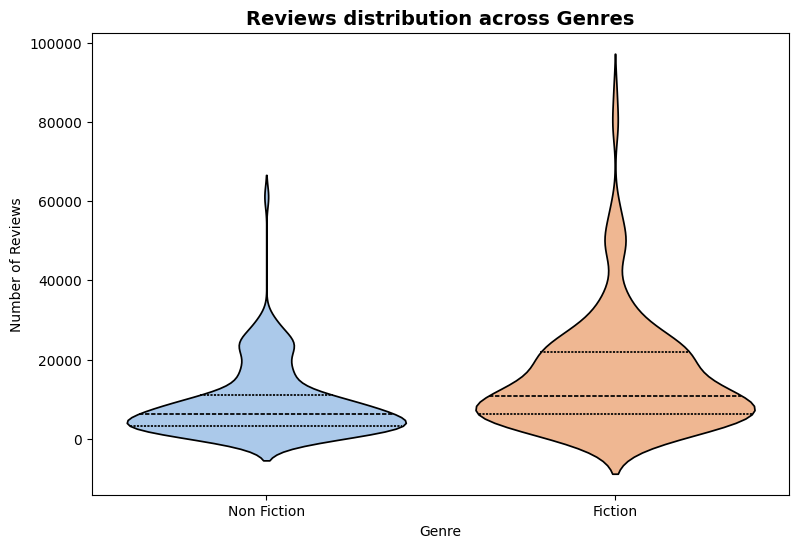

In [7]:
plt.figure(figsize = (9,6))
sns.violinplot(data = df, x = "Genre", y = "Reviews", palette = 'pastel', edgecolor = "Black", inner = 'quartile')
plt.title("Reviews distribution across Genres", fontsize = 14, weight= 'bold')
plt.xlabel("Genre")
plt.ylabel("Number of Reviews")
plt.show()

In [24]:
plt.savefig("assets/reviews_vs_genre.png", bbox_inches="tight", dpi=200)


<Figure size 640x480 with 0 Axes>

### Observation
Although non-fiction books appear more frequently on the bestseller list, fiction books tend to receive higher median reviews (~10,000 vs ~6,500), suggesting stronger reader engagement per title for fiction.


In [8]:
df['Price'].describe()

count    550.000000
mean      13.100000
std       10.842262
min        0.000000
25%        7.000000
50%       11.000000
75%       16.000000
max      105.000000
Name: Price, dtype: float64

In [9]:
!pip install plotly


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [10]:
import plotly.express as px
cute_pallete = {
    "Non-Fiction" : "Pastel Blue"
}

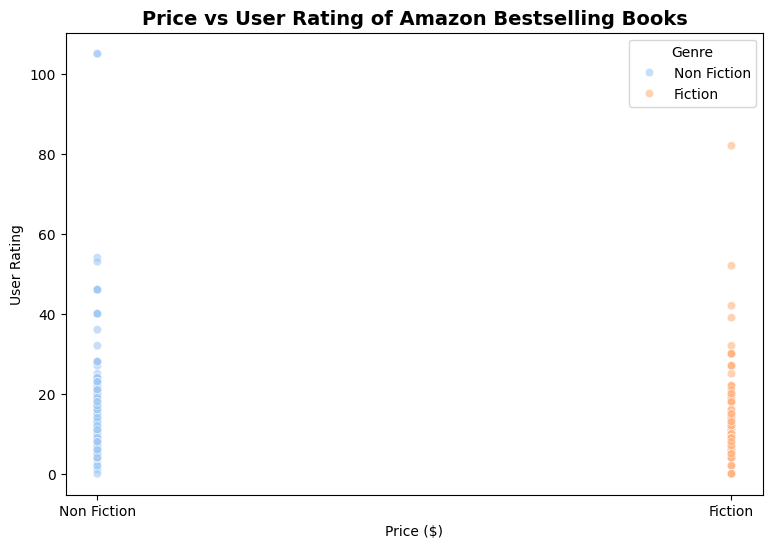

In [11]:
plt.figure(figsize = (9,6))
sns.scatterplot(data = df, x = "Genre", y = "Price", hue = "Genre", palette = 'pastel', alpha = 0.6)
plt.title("Price vs User Rating of Amazon Bestselling Books", fontsize = 14, weight = 'bold')
plt.xlabel("Price ($)")
plt.ylabel("User Rating")
plt.show()

In [12]:
import plotly.express as px
cute_palette = {
    "Non Fiction": "lightblue",
    "Fiction": "lightpink"
}
fig = px.scatter(
    df,
    x = "Price",
    y = "User Rating",
    color = "Genre",
    color_discrete_map = cute_palette,
    size = "Reviews",
    size_max = 35,
    hover_name = "Name",
    hover_data = "Author",
    title = "✨ Price Vs User Rating ✨",
    opacity = 0.85,
    template='plotly_white'
)
fig.update_traces(
    marker = dict(line = dict(width = 1.5, color = 'white'))
)
fig.update_layout(
    font = dict(family = "Times New Roman", size = 19, color = "black"),
    title_x = 0.5,
    xaxis_title = "Price ($)",
    yaxis_title = "User Ratings",
    plot_bgcolor = "white",
    xaxis = dict(showgrid = True, gridcolor = "beige"),
    yaxis = dict(showgrid = True, gridcolor = "beige")
)
fig.show()

## Interactive Cute Pastel Plot....

### Final Conclusion
The analysis shows that Amazon bestselling books consistently receive high user ratings across a wide range of prices.
Most bestsellers are priced below $20, indicating affordability does not compromise quality.
No strong correlation was observed between price and user rating, suggesting reader satisfaction depends more on content than cost.
